# LSTM

## Lyrics Data

In [15]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataset = pd.read_csv('Final Datasets/dataCleaned.csv')

In [3]:
def clean_text(text):
    text = re.sub(r"[^a-zA-Z']", " ", text)          # Remove non-alphabetic characters
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)      # Remove single characters
    text = text.lower()                              # Convert text to lower case
    return text

In [4]:
dataset['Lyric'] = dataset['Lyric'].apply(clean_text)

In [5]:
# Prepare the data
lyrics = dataset['Lyric'].tolist()
popularity = dataset['popularity'].tolist()

In [6]:
# Tokenize and pad the lyrics
max_len = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lyrics)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(lyrics)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [7]:
# Convert lists to NumPy arrays
padded_sequences = np.asarray(padded_sequences)
popularity = np.asarray(popularity)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, popularity, test_size=0.2, random_state=42)

In [8]:
# Build the model
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [9]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [10]:
# Train the model
batch_size = 64
epochs = 20

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)


Epoch 1/20
420/420 [==============================] - 307s 694ms/step - loss: 0.0410 - mae: 0.1626 - val_loss: 0.0342 - val_mae: 0.1481
Epoch 2/20
420/420 [==============================] - 299s 713ms/step - loss: 0.0308 - mae: 0.1388 - val_loss: 0.0364 - val_mae: 0.1520
Epoch 3/20
420/420 [==============================] - 294s 700ms/step - loss: 0.0207 - mae: 0.1116 - val_loss: 0.0385 - val_mae: 0.1562
Epoch 4/20
420/420 [==============================] - 291s 694ms/step - loss: 0.0150 - mae: 0.0944 - val_loss: 0.0407 - val_mae: 0.1606
Epoch 5/20
420/420 [==============================] - 292s 696ms/step - loss: 0.0107 - mae: 0.0787 - val_loss: 0.0443 - val_mae: 0.1664
Epoch 6/20
420/420 [==============================] - 294s 700ms/step - loss: 0.0083 - mae: 0.0687 - val_loss: 0.0431 - val_mae: 0.1646
Epoch 7/20
420/420 [==============================] - 307s 731ms/step - loss: 0.0067 - mae: 0.0615 - val_loss: 0.0448 - val_mae: 0.1673
Epoch 8/20
420/420 [============================

<Axes: >

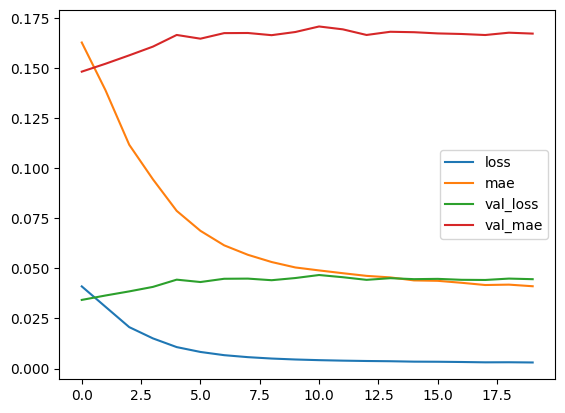

In [12]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [13]:
# Predicting the values
y_pred = model.predict(X_test)

263/263 [==============================] - 18s 57ms/step


## Model Performace

In [14]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.16926953782466247


In [16]:
#Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04508657011284038
